<a href="https://colab.research.google.com/github/sgrpwr/Research/blob/master/HandWrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow

In [0]:
import tensorflow as tf
# tf.__version__
mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)




Epoch 1/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2576 - acc: 0.9211
Epoch 2/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.1086 - acc: 0.9666
Epoch 3/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0786 - acc: 0.9747
Epoch 4/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0614 - acc: 0.9804
Epoch 5/5
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0482 - acc: 0.9850


In [0]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 77us/sample - loss: 0.1024 - acc: 0.9703
0.10242308059700299 0.9703


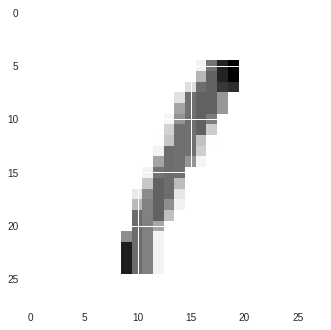

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[77])
plt.show()
print(x_train[77])

In [0]:
model.save('epic_num_reader.model')

In [0]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [0]:
predictions = new_model.predict(x_test)
print(predictions)

[[1.2456004e-08 2.1940819e-04 8.2423758e-05 ... 9.9928892e-01
  3.0615672e-06 1.1860178e-05]
 [3.5749583e-13 2.6776124e-09 1.0000000e+00 ... 2.7667468e-10
  2.0335135e-10 2.6437489e-16]
 [1.5747941e-11 9.9999988e-01 3.8366652e-09 ... 7.4085520e-09
  4.2021330e-08 1.6742531e-08]
 ...
 [1.5648339e-09 4.9212318e-08 6.9691126e-08 ... 2.6418123e-09
  7.2037989e-09 2.7891938e-08]
 [5.7142507e-12 6.7680930e-12 9.0495259e-12 ... 5.7104369e-12
  2.2536378e-07 4.9125048e-10]
 [8.0828823e-07 3.9402495e-10 1.4849146e-09 ... 6.7268370e-13
  7.4473616e-10 1.5195531e-11]]


In [0]:
import numpy as np
print(np.argmax(predictions[2000]))

6


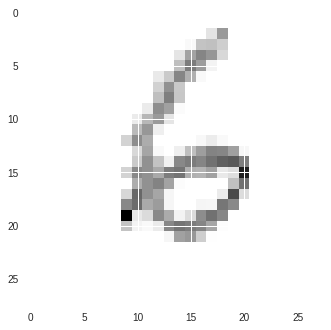

In [0]:
plt.imshow(x_test[2000],cmap=plt.cm.binary)
plt.show()